# Practice Exercise - Intro to NN Week 1
## A MNIST-like fashion product database

Hello learners, welcome to the practice exercise on week 1 of Intro to NN module.<br>
Before we start with the hands-on, please note that <b>we recommend</b> using <a href = "https://colab.research.google.com/notebooks/intro.ipynb#recent=true"> google colab</a> for all your course hands-on exercises.

In this practice exercise, we classify the images into respective classes given in the dataset. We use a Deep Neural Net in Keras to solve this and check the accuracy scores.

<b>Dataset to be used</b>: tf.keras.datasets.fashion_mnist

## Load tensorflow

In [1]:
import warnings
import tensorflow as tf


In [2]:
tf.__version__

'2.0.0'

## Collect Data

In [3]:
(trainX, trainY), (testX,testY) = tf.keras.datasets.fashion_mnist.load_data()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
4423680/4422102 [==============================] - 4s 1us/step


In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
testY.shape

(10000,)

In [6]:
testY.view()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Convert both training and testing labels into one-hot vectors.

Hint: check tf.keras.utils.to_categorical()

In [7]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

Expected output should look like

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Visualize the data
Plot first 10 images in the triaining set and their labels.

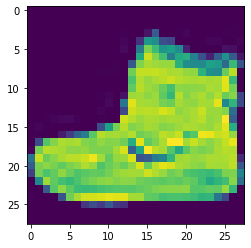

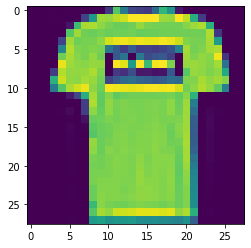

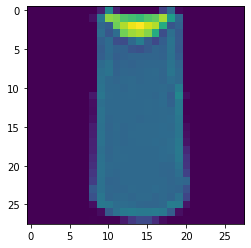

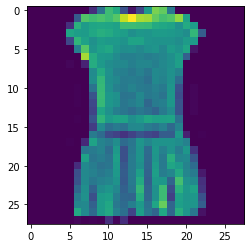

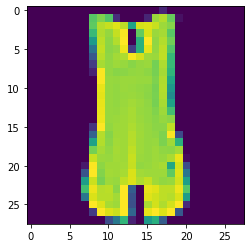

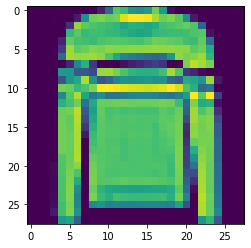

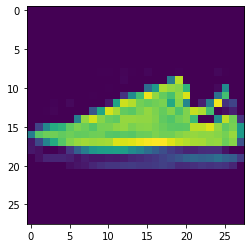

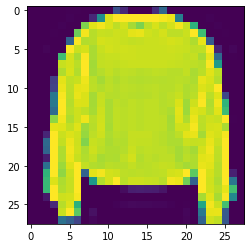

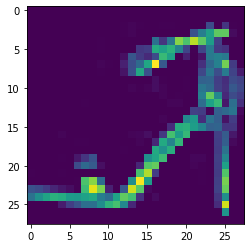

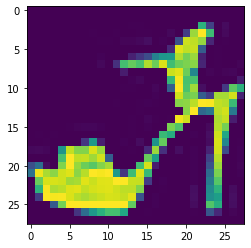

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    image = trainX[i]
    plt.figure(i)
    plt.imshow(image)

## Build a neural network in Keras using a sequential model. The output layer should have 10 neurons as we have 10 classes.


In [10]:
#Initialize sequenial model
model = tf.keras.models.Sequential()

In [11]:
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [12]:
#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [13]:
#compile the model
#for now, explore the optimizer, loss and metric parameters of the compile function. Use values "optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy']" respectively.

model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

### Execute the model using model.fit()

In [14]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 247.2969 - accuracy: 0.0989 - val_loss: 6724.8999 - val_accuracy: 0.3023
Epoch 2/10
60000/60000 [==============================] - 1s 11us/sample - loss: 6699.5425 - accuracy: 0.3052 - val_loss: 12272.3857 - val_accuracy: 0.2521
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 12197.7197 - accuracy: 0.2544 - val_loss: 15417.4141 - val_accuracy: 0.2314
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 15313.6641 - accuracy: 0.2353 - val_loss: 15959.1221 - val_accuracy: 0.2644
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 15845.2207 - accuracy: 0.2627 - val_loss: 15056.0352 - val_accuracy: 0.3168
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 15036.3564 - accuracy: 0.3153 - val_loss: 14060.4268 - val_accuracy: 0.2704
Epoch 7/10
6

### Customize the learning rate to 0.001 in sgd optimizer and run the model


In [15]:
#Initialize the sequential model
model=tf.keras.models.Sequential()

In [16]:
#Reshape the data from 2D to 1D -> 28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [17]:
# Add dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [18]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 202.4380 - accuracy: 0.7398 - val_loss: 294.3535 - val_accuracy: 0.7063
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 162.7625 - accuracy: 0.7758 - val_loss: 138.0417 - val_accuracy: 0.7738
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 151.8805 - accuracy: 0.7873 - val_loss: 214.5868 - val_accuracy: 0.7582
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 151.0471 - accuracy: 0.7884 - val_loss: 112.3112 - val_accuracy: 0.7890
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 149.1821 - accuracy: 0.7930 - val_loss: 171.6668 - val_accuracy: 0.7730
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 145.9649 - accuracy: 0.7941 - val_loss: 127.5981 - val_accuracy: 0.8101
Epoch 7/10
60000/60000 [========

### Model Review
#### Summarize the model using model.summary 


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Play around with your neural network model by changing the number of dense layers, learning rate, number of neurons in hidden layers. Try out different loss and activation functions and see if you can get better accuracy. <br><br>
Also use the summary function to summarize the models.<br><br>

*Happy Learning!* 
